<a href="https://colab.research.google.com/github/sloumotion/hunting_grounds/blob/master/notebooks/trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Clone repository and move into base folder

!git clone https://github.com/sloumotion/hunting_grounds.git
%cd hunting_grounds

# Visualize folder structure
!apt-get install tree
!tree

Cloning into 'hunting_grounds'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 86 (delta 32), reused 77 (delta 26), pack-reused 0
Unpacking objects: 100% (86/86), done.
/content/hunting_grounds/hunting_grounds
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
.
├── agent
│   ├── cnn_agent.py
│   ├── q_table.py
│   └── trainer.py
├── environment
│   ├── hunting_grounds.py
│   ├── __init__.py
│   └── utils
│       ├── __init__.py
│       └── visualizer.py
├── __init__.py
├── main.py
├── notebooks
│   └── trainer.ipynb
└── README.md

4 directories, 11 files


In [3]:
# Optional: Checkout specific branch

!git checkout master
!git pull

Already on 'master'
Your branch is up to date with 'origin/master'.
Already up to date.


In [0]:
from tqdm import trange
import numpy as np

from environment.hunting_grounds import HuntingGrounds as Environment
from agent.cnn_agent import CnnAgent as Agent

world_dimensions = (10, 10)

environment = Environment(world_dimensions, headless=True)
agent = Agent(world_dimensions, 5)

In [0]:
def run_until_terminal(agent, environment, exploration_probability=0., max_steps=100):
    experiences = []

    state = environment.get_state()

    terminal = False

    step = 1

    while not terminal:

        if exploration_probability > np.random.random():
            action = np.random.randint(5)
        else:
            action = agent.predict(state)

        reward, terminal = environment.step(action)

        if step >= max_steps and not terminal:
            terminal = True
            reward = -1

        next_state = environment.get_state()

        experience = [state, action, reward, next_state, terminal]

        experiences.append(experience)

        state = next_state
        
        step += 1

    return experiences


In [6]:
epochs = 100

statistics = {"steps": [], "reward": []}

for epoch in trange(epochs):

    environment.reset()
    
    if epoch % 50 == 0:
        experiences = run_until_terminal(agent, environment)

        reward = sum([e[2] for e in experiences])
        steps = len(experiences)

        statistics["reward"].append(reward)
        statistics["steps"].append(steps)
        
    experiences = run_until_terminal(agent, environment, 1 - (epoch / epochs))

    for experience in experiences:
        agent.add_experience(*experience)

    agent.train()

100%|██████████| 100/100 [00:08<00:00,  6.78it/s]


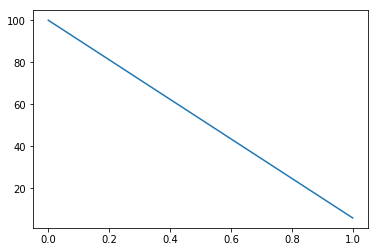

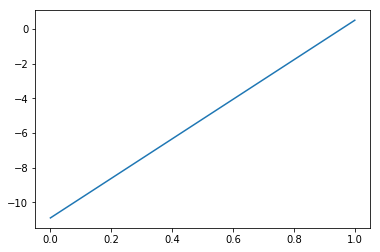

In [7]:
import matplotlib.pyplot as plt

plt.plot(statistics["steps"])

plt.figure()
plt.plot(statistics["reward"])